### 크롤링 순서

#### 1. 지역 검색 

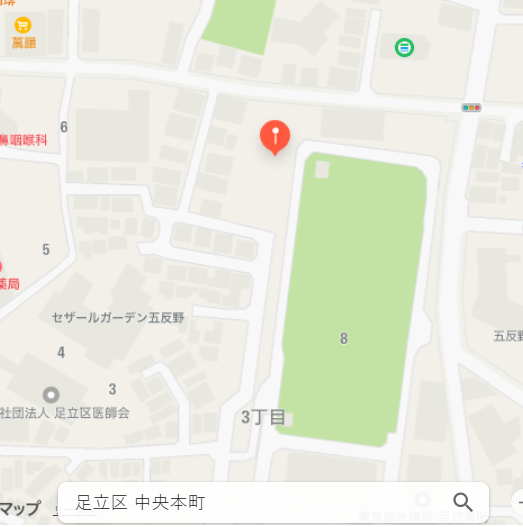

#### 2. 지도 축소 - fire 객체 불러오기 위해
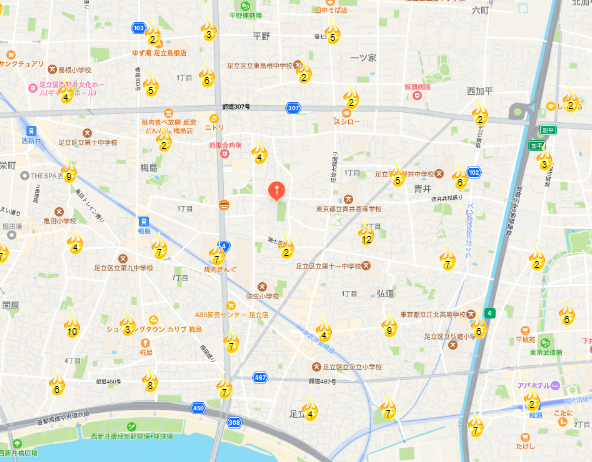

#### 4. fire 객체 클릭 1
fire가 여러개 모여있으면 클릭시에 확대되며 정보는 불러오지 않음 
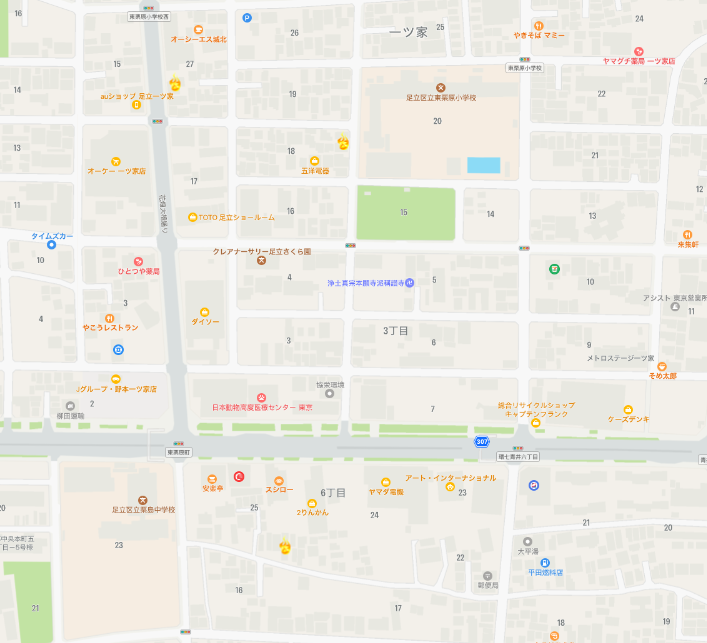

#### 5. fire 객체 클릭 2 - 데이터 수집
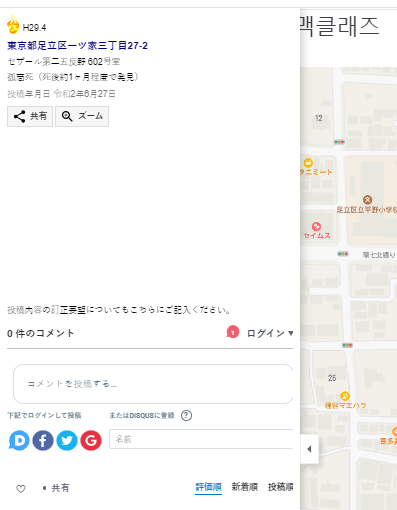

#### 로직의 문제점 
수동으로 지역을 검색하기 때문에 지역의 위치가 조금만 바뀌어도 새로운 객체인지 내가 수집했던 객체인지 분별이 어려움 

fire 가 여러 개 있을수록 정보를 불러오기위해 여러번의 클릭이 필요 -> 클릭하는 동안 지도의 좌표는 계속 바뀌므로 객제 선별이 어려움 

- 검색시 지역 단위를 쪼개서 fire 객체에 정보를 불러올때 내가 검색한 지역의 정보만 가져오려함.. 근데 중복 객체인지 판별을 어떻게 할지 고민 -> 수집할때마다 확인하기에는 시간이 너무 많이 걸릴것같음 

### 도쿄 부동산 사건 데이터 수집 
출처 :  <a href = 'http://www.oshimaland.co.jp'> 오시마랜드 </a>

사이트 정보 : 본 웹사이트는 자살사건, 시체유기사건, 살인사건 등 과거에 불미스러운 사건이 있었던 건물을 모아서 보여줍니다.

도쿄 23구와 다마 지역 (26개의 도시) 데이터 수집 할 예정이다 

특별도 각 구청 : https://good-luck-day.com/tokyo-district-list/

도쿄 23구 

    가쓰시카구(葛飾区)
    고토구(江東区)
    기타구(北区)
    나카노구(中野区)
    네리마구(練馬区)
    다이토구(台東区)
    도시마구(豊島区)
    미나토구(港区)
    메구로구(目黒区)
    스미다구(墨田区)
    스기나미구(杉竝区)
    신주쿠구(新宿区)
    세타가야구(世田谷区)
    시나가와구(品川区)
    시부야구(渋谷区)
    아다치구(足立区)
    아라카와구(荒川区)
    에도가와구(江戸川区)
    이타바시구(板橋区)
    오타구(大田区)
    분쿄구(文京区)
    주오구(中央区)
    지요다구(千代田区)


다마 지역

    고가네이시(小金井市)
    고다이라시(小平市)
    고마에시(狛江市)
    고쿠분지시(国分寺市)
    구니타치시(国立市)
    기요세시(清瀬市)
    니시토쿄시(西東京市)
    다마시(多摩市)
    다치카와시(立川市)
    마치다시(町田市)
    무사시노시(武藏野市)
    무사시무라야마시(武藏村山市)
    미타카시(三鷹市)
    아키루노시(あきる野市)
    아키시마시(昭島市)
    오메시(青梅市)
    이나기시(稲城市)
    조후시(調布市)
    하무라시(羽村市)
    하치오지시(八王子市)
    후추시(府中市)
    훗사시(福生市)
    히가시무라야마시(東村山市)
    히가시야마토시(東大和市)
    히가시쿠루메시(東久留米市)
    히노시(日野市)

In [ ]:
!pip install webdriver-manager

In [1]:
import pandas as pd
import numpy as np 

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import time

In [2]:
#1. oshimaland 웹사이트 불러오기
def loadWeb(driver, url):
    
    # 화면 최대 크기 설정 
    driver.maximize_window()
    driver.get(url)
    #모든 창이 로딩 될떄까지 기다려 줌 
    time.sleep(3)
    #팝업창 화면 전환 후 닫아주기
    multi_window = driver.window_handles
    if(len(multi_window)>1):
        driver.switch_to.window(driver.window_handles[-1])
        driver.close()
        time.sleep(3)
        # 접근 페이지 다시 요청
        driver.switch_to.window(driver.window_handles[-1])
   
    driver.get(url)

In [3]:
def searchFire(driver, region_list):
    search_region = driver.find_element(By.CSS_SELECTOR, '#geocoder-text')

    for i in range(1,5):
        serach = region_list[0]+region_list[i]
        search_region.clear()
        search_region.send_keys(serach)
        time.sleep(2)
        search_btn = driver.find_element(By.ID, "geocoder-button")
        search_btn.click()
        time.sleep(2)
        # 지도 줌인 
        # map_zomm_in = driver.find_element(By.CSS_SELECTOR,'div.mk-bottom-right-controls-container.mk-controls-container-controls-normal > div > div.mk-zoom-in')
        # map_zomm_in.click()
        # 지도 줌 아웃 
        # map_zom_out.click()



In [4]:
region_list = ['足立区 ', '中央本町', '伊興', '梅田', '本木', '小台', '江北', '佐野', '鹿浜', '新田', '千住', '竹の塚', '入谷', '中川', '西新井', '花畑', '東綾瀬', '保塚']


In [284]:
url = 'https://www.oshimaland.co.jp/'
chrome_option = webdriver.ChromeOptions()
driver = webdriver.Chrome(ChromeDriverManager().install(), options=chrome_option)
loadWeb(driver, url)


[WDM] - Downloading: 100%|██████████| 6.30M/6.30M [00:02<00:00, 2.42MB/s]


In [285]:
searchFire(driver, region_list) 

In [291]:
from selenium.webdriver.common.action_chains import ActionChains
# https://stackoverflow.com/questions/64474653/how-to-webscrape-a-canvas-element-with-python-selenium
canvas = driver.find_element(By.CSS_SELECTOR, '#map-canvas > div.mk-map-view.mk-disable-all-gestures > canvas.rt-root')
action = ActionChains(driver)


In [297]:
map_canvas = driver.find_element_by_css_selector("div.mk-map-view > canvas.rt-root")

from selenium.webdriver.common.action_chains import ActionChains

# 지도 요소 위에서 마우스를 움직임
actions = ActionChains(driver)
actions.move_to_element(map_canvas).click().perform()

actions.move_by_offset(0, 200).perform() # 줌인만 가능 

In [309]:
from selenium.common.exceptions import  WebDriverException 
def wheel_element(element, deltaY=120, offsetX=0, offsetY=0):
    error = element.parent.execute_script("""
        var element = arguments[0];
        var deltaY = arguments[1];
        var box = element.getBoundingClientRect();
        var clientX = box.left + (arguments[2] || box.width / 2);
        var clientY = box.top + (arguments[3] || box.height / 2);
        var target = element.ownerDocument.elementFromPoint(clientX, clientY);

        for (var e = target; e; e = e.parentElement) {
            if (e === element) {
                target.dispatchEvent(new MouseEvent('mouseover', {view: window, bubbles: true, cancelable: true, clientX: clientX, clientY: clientY}));
                target.dispatchEvent(new MouseEvent('mousemove', {view: window, bubbles: true, cancelable: true, clientX: clientX, clientY: clientY}));
                target.dispatchEvent(new WheelEvent('wheel', {view: window, bubbles: true, cancelable: true, clientX: clientX, clientY: clientY, deltaY: deltaY}));
                return;
            }
        }    
        return "Element is not interactable";
    """, element, deltaY, offsetX, offsetY)
    if error:
        raise WebDriverException(error)

In [311]:
canvas = driver.find_element_by_css_selector("div.mk-map-view > canvas.rt-root")
action.move_to_element(canvas).perform()
# zoom in with mouse wheel
wheel_element(canvas, -120)

In [306]:
canvas = driver.find_element(By.CSS_SELECTOR, "div.mk-map-view > canvas.rt-root")
from selenium.webdriver.common.action_chains import ActionChains

# 지도 요소 위에서 마우스를 움직임
actions = ActionChains(driver)
actions.move_to_element(canvas).click().perform()
actions.move_by_offset(0, -100).perform()


In [327]:
#줌인 줌아웃 반복 
action.move_to_element(canvas).move_by_offset(0, 0).click_and_hold().perform()
action.move_by_offset(-200,0).release().perform()

In [328]:
action.move_to_element(canvas).click().perform()
action.move_to_element_with_offset(canvas, 0, 0).perform()
action.move_by_offset(0, -50).perform()
action.send_keys(Keys.CONTROL, Keys.SUBTRACT).perform()

In [ ]:
#### git error test